In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('text_file/household_power_consumption.txt', sep=';', 
                 parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='date_time')

'''
Note that data include 'nan' and '?' as a string. I converted both to numpy nan in importing stage (above) and treated both of them the same.
I merged two columns 'Date' and 'Time' to 'dt'.
I also converted in the above, the data to time-series type, by taking index to be the time.
'''

"\nNote that data include 'nan' and '?' as a string. I converted both to numpy nan in importing stage (above) and treated both of them the same.\nI merged two columns 'Date' and 'Time' to 'dt'.\nI also converted in the above, the data to time-series type, by taking index to be the time.\n"

## Prediction Task

We are going to predict hourly levels of global active power one step ahead.

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.shape

(2075259, 7)

In [6]:
print(df.isnull().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [7]:
missing_values_count = df.isnull().sum()

total_rows = len(df)

missing_values_percentage = (missing_values_count / total_rows) * 100 

# percentage of column values that are missing
print(missing_values_percentage)

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


In [8]:
print(df.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

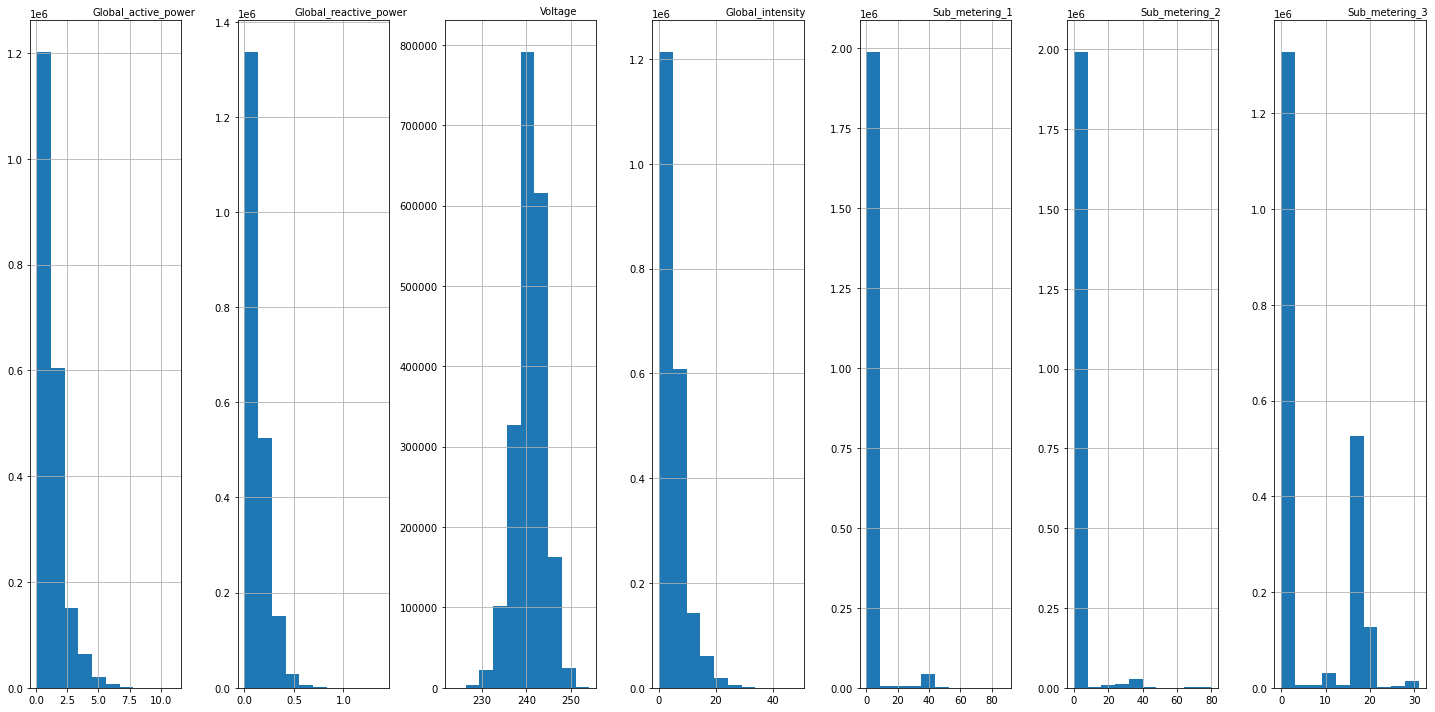

In [9]:

num_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 10))

    
for i, col in enumerate(num_cols):
    ax = axes[i]
    df[col].hist(ax=ax)
    ax.set_title(col)
    title = ax.set_title(col, fontsize=10)  # Reduce font size for titles
    title.set_position([0.75, 1.05])  # Adjust the title position
  
    
plt.tight_layout()

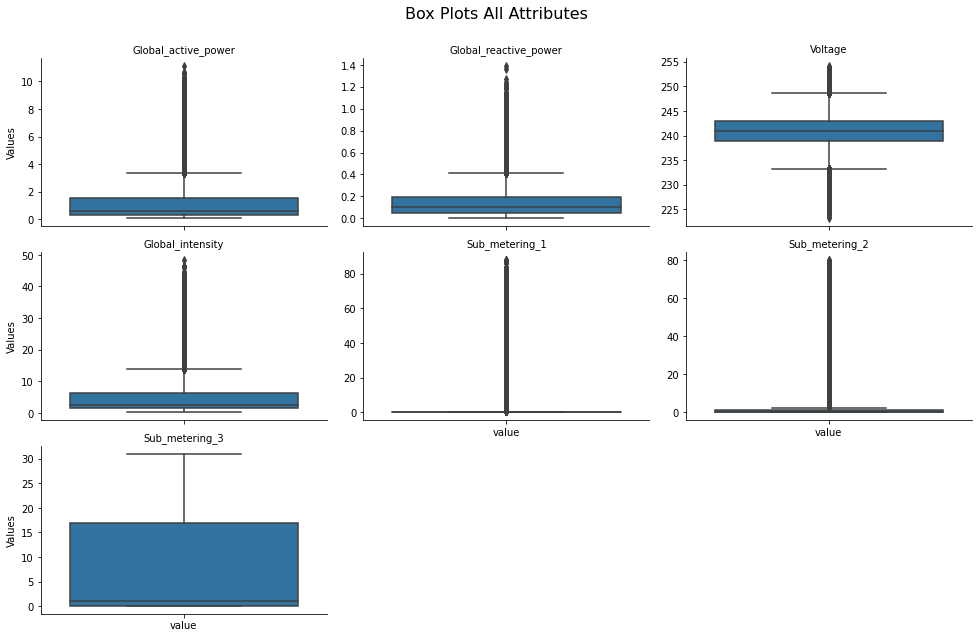

In [10]:
selected_attributes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Create a grid of box plots
selected_attributes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Reshape the DataFrame using 'melt' to create the 'variable' column
data_melted = pd.melt(df[selected_attributes], var_name='variable')

# Create a FacetGrid with 'variable' as columns
g = sns.FacetGrid(data_melted, col='variable', col_wrap=3, aspect=1.5, sharey=False)
g.map_dataframe(sns.boxplot, orient='v')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('', 'Values')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Box Plots All Attributes', fontsize=16)
plt.show()

## NaN value clean-up

In [11]:
df_v2 = df.copy()

In [12]:
df_v2['Global_active_power'] = df['Global_active_power'].fillna(df['Global_active_power'].median())
df_v2['Global_reactive_power'] = df['Global_reactive_power'].fillna(df['Global_reactive_power'].median())
df_v2['Global_intensity'] = df['Global_intensity'].fillna(df['Global_intensity'].median())
df_v2['Sub_metering_1'] = df['Sub_metering_1'].fillna(df['Sub_metering_1'].median())
df_v2['Sub_metering_2'] = df['Sub_metering_2'].fillna(df['Sub_metering_2'].median())
df_v2['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())

# Skewed distribution, impute with nan value with median

In [13]:
df_v2['Voltage'] = df['Voltage'].fillna(df['Voltage'].mean())

# Skewed distribution, impute with nan value with mean

In [14]:
print(df_v2.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


## Seasonal analysis

In [15]:
season_df = df_v2.copy()
season_df.reset_index(inplace=True)

In [16]:
season_df['date_time'] = pd.to_datetime(season_df['date_time'])

# Define a function to get the season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Create the new 'season' column based on the 'date_time' column
season_df['season'] = season_df['date_time'].dt.month.map(get_season)


In [17]:
description = season_df.groupby('season').describe().style.format("{:.2f}")
description.background_gradient(cmap='coolwarm')


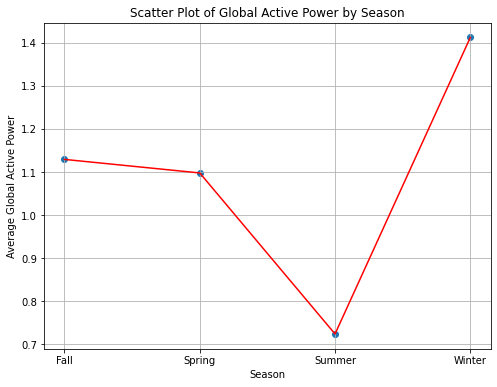

In [18]:
SeasonGroupGlobal = season_df.groupby('season')['Global_active_power'].mean()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(SeasonGroupGlobal.index, SeasonGroupGlobal.values)
plt.plot(SeasonGroupGlobal.index, SeasonGroupGlobal.values, color='red')
plt.plot
plt.xlabel('Season')
plt.ylabel('Average Global Active Power')
plt.title('Scatter Plot of Global Active Power by Season')
plt.grid(True)
plt.show()

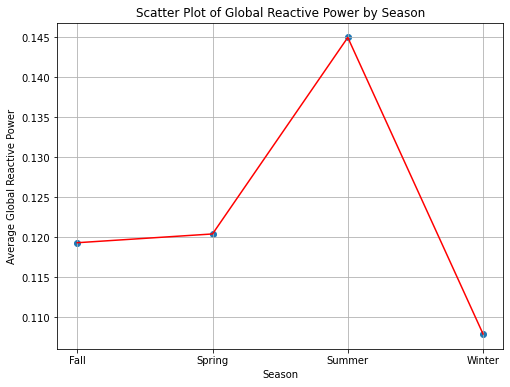

In [19]:
SeasonGroupGlobal = season_df.groupby('season')['Global_reactive_power'].mean()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(SeasonGroupGlobal.index, SeasonGroupGlobal.values)
plt.plot(SeasonGroupGlobal.index, SeasonGroupGlobal.values, color='red')
plt.plot
plt.xlabel('Season')
plt.ylabel('Average Global Reactive Power')
plt.title('Scatter Plot of Global Reactive Power by Season')
plt.grid(True)
plt.show()

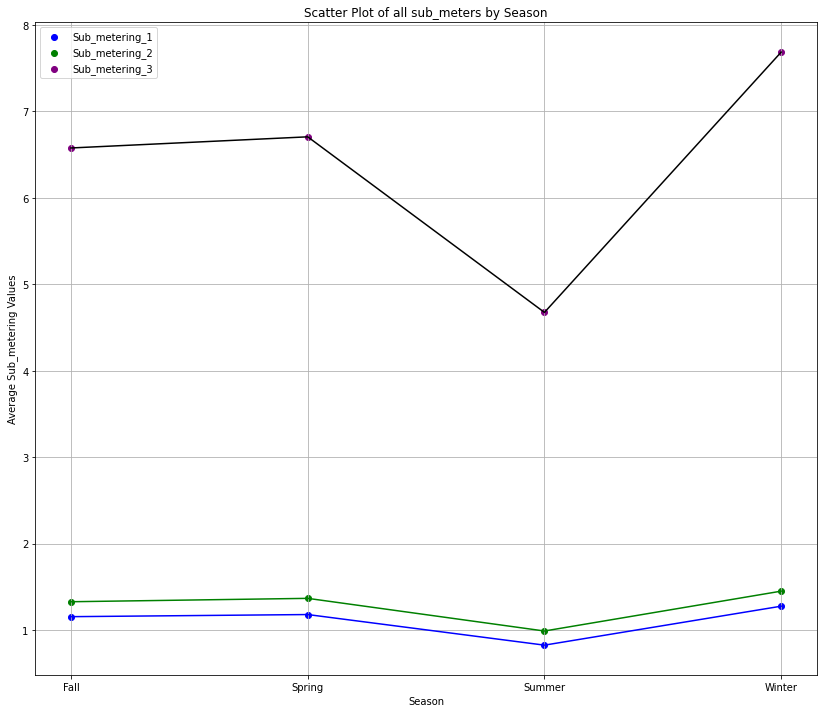

In [20]:
seasonGroup = season_df.groupby('season')
SeasonGroupSubMeter1 = seasonGroup['Sub_metering_1'].mean()
SeasonGroupSubMeter2 = seasonGroup['Sub_metering_2'].mean()
SeasonGroupSubMeter3 = seasonGroup['Sub_metering_3'].mean()
# Create a scatter plot with 'Sub_metering_1'
plt.figure(figsize=(14, 12))
plt.scatter(SeasonGroupSubMeter1.index, SeasonGroupSubMeter1.values, label='Sub_metering_1', color='blue')
plt.plot(SeasonGroupSubMeter1.index, SeasonGroupSubMeter1.values, color='blue')

# Add 'Sub_metering_2' on the same plot
plt.scatter(SeasonGroupSubMeter2.index, SeasonGroupSubMeter2.values, label='Sub_metering_2', color='green')
plt.plot(SeasonGroupSubMeter2.index, SeasonGroupSubMeter2.values, color='green')

#Add 'Sub_metering_3' on the same plot
plt.scatter(SeasonGroupSubMeter3.index, SeasonGroupSubMeter3.values, label='Sub_metering_3', color='purple')
plt.plot(SeasonGroupSubMeter3.index, SeasonGroupSubMeter3.values, color='black')

plt.xlabel('Season')
plt.ylabel('Average Sub_metering Values')
plt.title('Scatter Plot of all sub_meters by Season')
plt.legend()
plt.grid(True)
plt.show()

# Global Active Power

In [21]:
# Global Active Power

# .plot(title='Global_active_power resampled over day for mean', color='red')
# gap stands for Global Active Power

daily_resampled_data_gap = df_v2.Global_active_power.resample('D').mean() 
weekly_resampled_data_gap = df_v2.Global_active_power.resample('W').mean()
monthly_resampled_data_gap = df_v2.Global_active_power.resample('M').mean()
quarter_resampled_data_gap = df_v2.Global_active_power.resample('Q').mean()

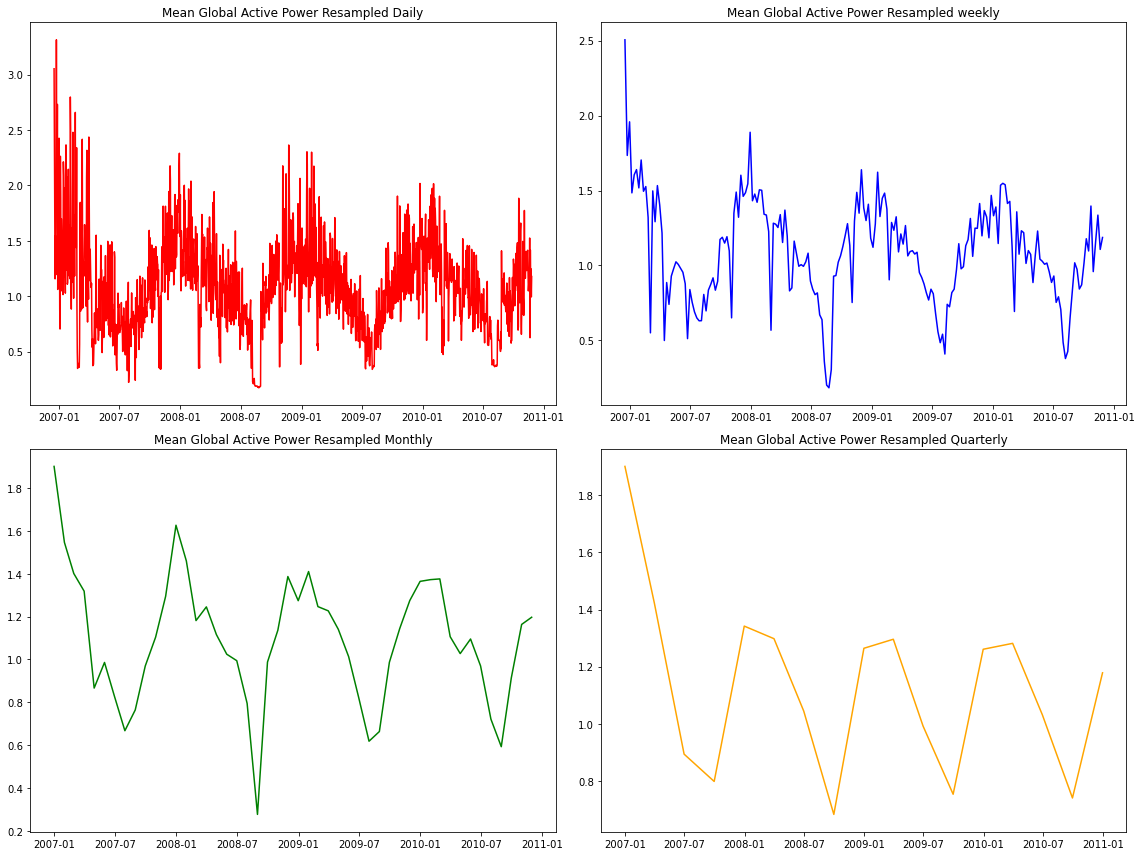

In [22]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

axes[0, 0].plot(daily_resampled_data_gap, color='red')
axes[0, 0].set_title('Mean Global Active Power Resampled Daily', fontsize=12)

axes[0, 1].plot(weekly_resampled_data_gap, color='blue')
axes[0, 1].set_title('Mean Global Active Power Resampled weekly', fontsize=12)

axes[1, 0].plot(monthly_resampled_data_gap, color='green')
axes[1, 0].set_title('Mean Global Active Power Resampled Monthly', fontsize=12)

axes[1, 1].plot(quarter_resampled_data_gap, color='orange')
axes[1, 1].set_title('Mean Global Active Power Resampled Quarterly', fontsize=12)

plt.tight_layout()

plt.show()

# Global Reactive Power

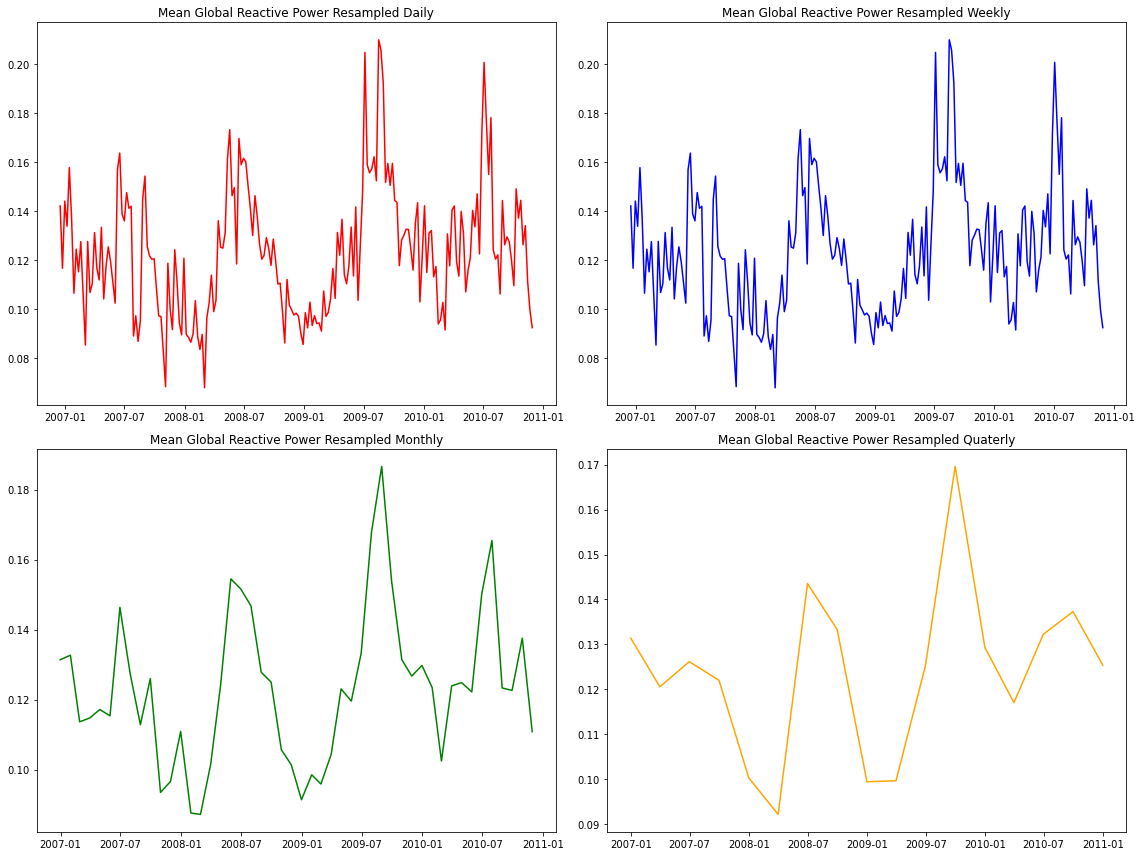

In [23]:


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

axes[0, 0].plot(df_v2.Global_reactive_power.resample('W').mean() , color='red')
axes[0, 0].set_title('Mean Global Reactive Power Resampled Daily', fontsize=12)

axes[0, 1].plot(df_v2.Global_reactive_power.resample('W').mean() , color='blue')
axes[0, 1].set_title('Mean Global Reactive Power Resampled Weekly', fontsize=12)

axes[1, 0].plot(df_v2.Global_reactive_power.resample('M').mean() , color='green')
axes[1, 0].set_title('Mean Global Reactive Power Resampled Monthly', fontsize=12)

axes[1, 1].plot(df_v2.Global_reactive_power.resample('Q').mean() , color='orange')
axes[1, 1].set_title('Mean Global Reactive Power Resampled Quaterly', fontsize=12)


plt.tight_layout()

plt.show()

## Voltage

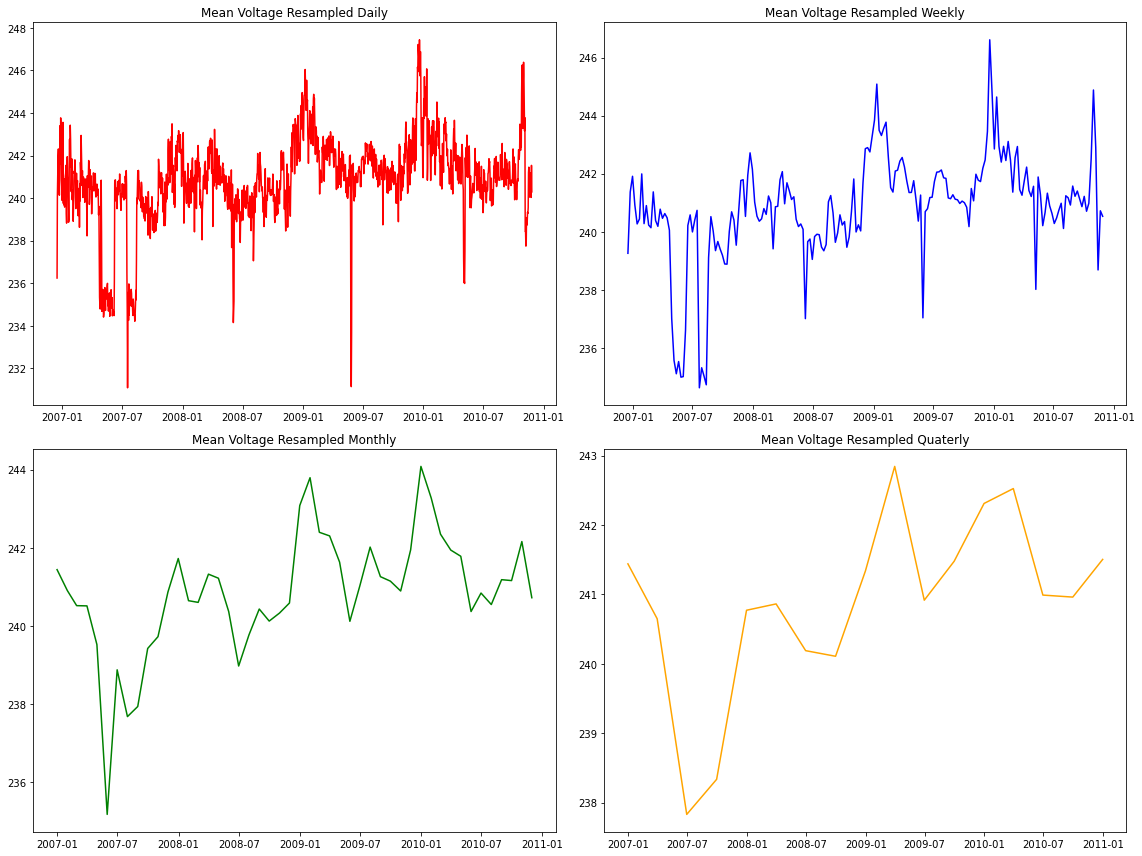

In [24]:


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

axes[0, 0].plot(df_v2.Voltage.resample('D').mean() , color='red')
axes[0, 0].set_title('Mean Voltage Resampled Daily', fontsize=12)

axes[0, 1].plot(df_v2.Voltage.resample('W').mean() , color='blue')
axes[0, 1].set_title('Mean Voltage Resampled Weekly', fontsize=12)

axes[1, 0].plot(df_v2.Voltage.resample('M').mean() , color='green')
axes[1, 0].set_title('Mean Voltage Resampled Monthly', fontsize=12)

axes[1, 1].plot(df_v2.Voltage.resample('Q').mean() , color='orange')
axes[1, 1].set_title('Mean Voltage Resampled Quaterly', fontsize=12)


plt.tight_layout()

plt.show()

Notice that the variance of the voltage is low across different time period (Day, Week, Month, Quarter). The graphs above fluctuates due to the scaling of the y-axis. Let's try to set the lower y-axis to zero to see the effect.

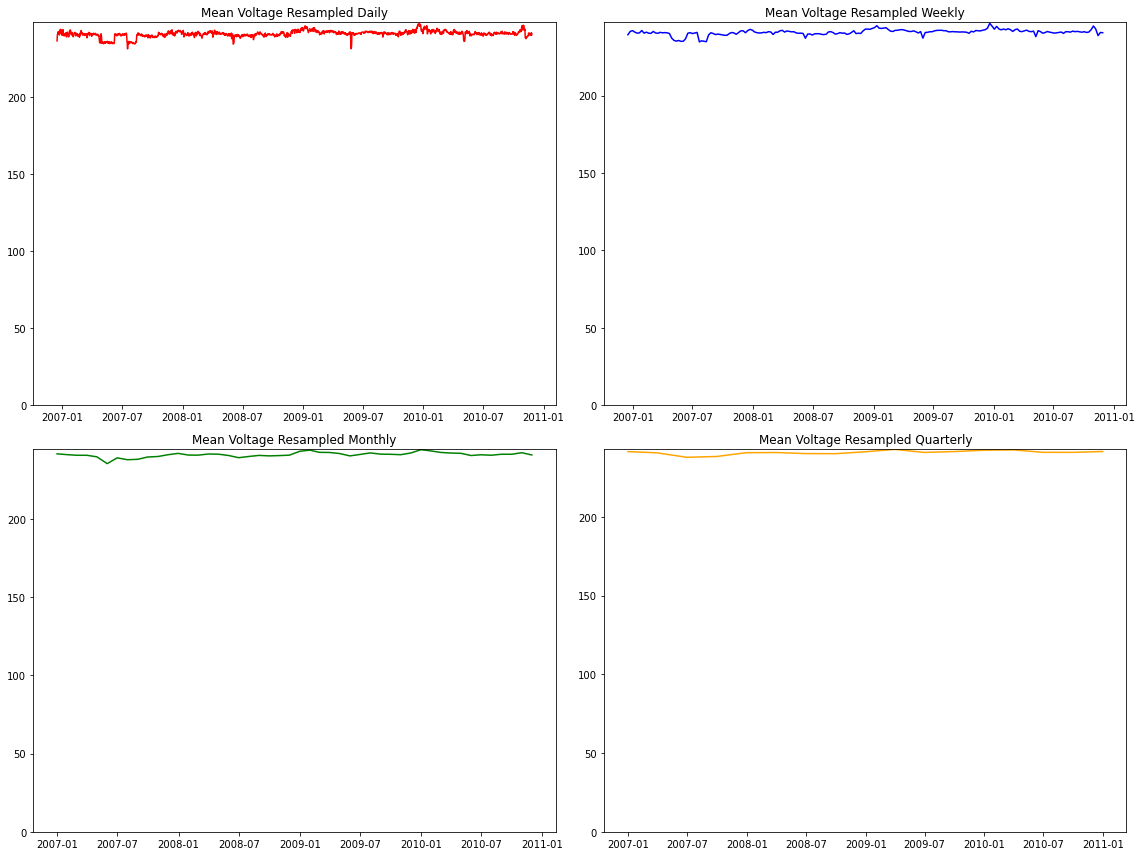

In [25]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

axes[0, 0].plot(df_v2.Voltage.resample('D').mean(), color='red')
axes[0, 0].set_title('Mean Voltage Resampled Daily', fontsize=12)
axes[0, 0].set_ylim(0)  # Set the y-axis lower limit to zero

axes[0, 1].plot(df_v2.Voltage.resample('W').mean(), color='blue')
axes[0, 1].set_title('Mean Voltage Resampled Weekly', fontsize=12)
axes[0, 1].set_ylim(0)  # Set the y-axis lower limit to zero

axes[1, 0].plot(df_v2.Voltage.resample('M').mean(), color='green')
axes[1, 0].set_title('Mean Voltage Resampled Monthly', fontsize=12)
axes[1, 0].set_ylim(0)  # Set the y-axis lower limit to zero

axes[1, 1].plot(df_v2.Voltage.resample('Q').mean(), color='orange')
axes[1, 1].set_title('Mean Voltage Resampled Quarterly', fontsize=12)
axes[1, 1].set_ylim(0)  # Set the y-axis lower limit to zero

plt.tight_layout()

plt.show()


## Global Intensity

As we can see the voltage stays flat throughout the years.

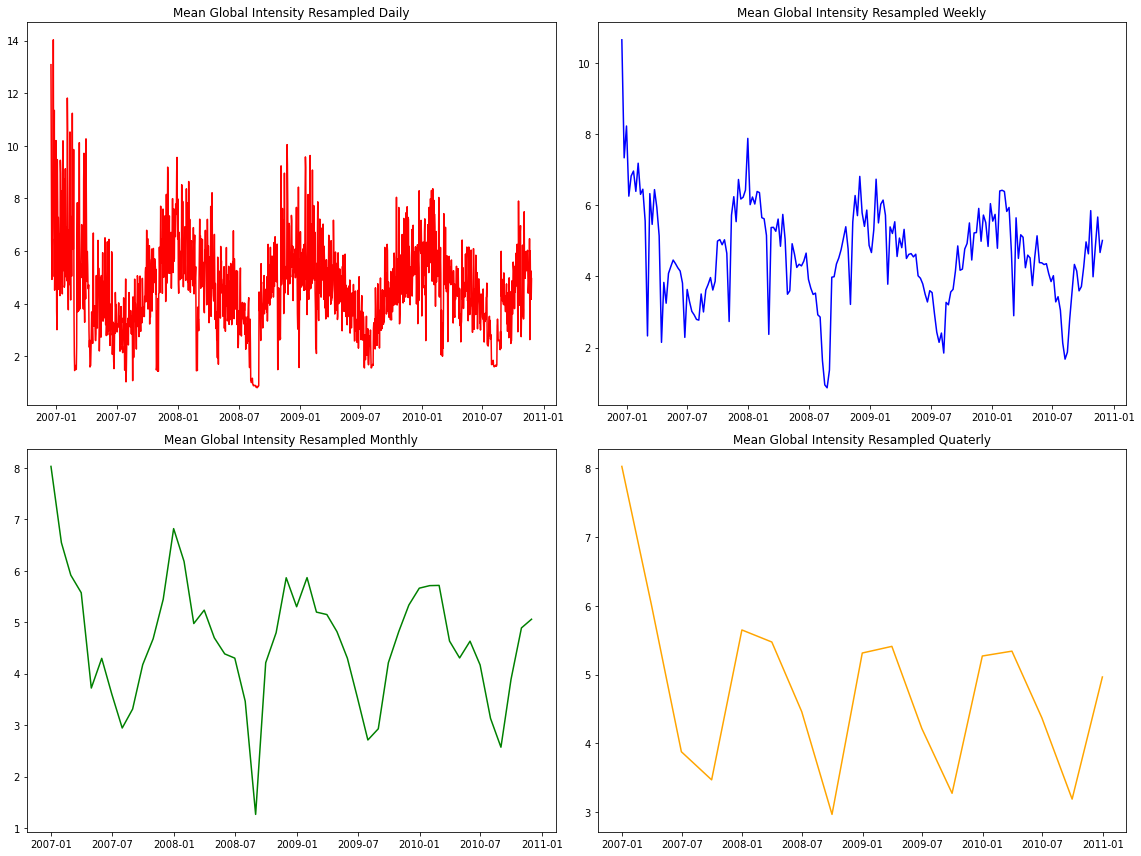

In [26]:


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

axes[0, 0].plot(df_v2.Global_intensity.resample('D').mean() , color='red')
axes[0, 0].set_title('Mean Global Intensity Resampled Daily', fontsize=12)

axes[0, 1].plot(df_v2.Global_intensity.resample('W').mean() , color='blue')
axes[0, 1].set_title('Mean Global Intensity Resampled Weekly', fontsize=12)

axes[1, 0].plot(df_v2.Global_intensity.resample('M').mean() , color='green')
axes[1, 0].set_title('Mean Global Intensity Resampled Monthly', fontsize=12)

axes[1, 1].plot(df_v2.Global_intensity.resample('Q').mean() , color='orange')
axes[1, 1].set_title('Mean Global Intensity Resampled Quaterly', fontsize=12)


plt.tight_layout()

plt.show()

## Sub_metering_1 /2 /3  

* sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

* sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

* sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

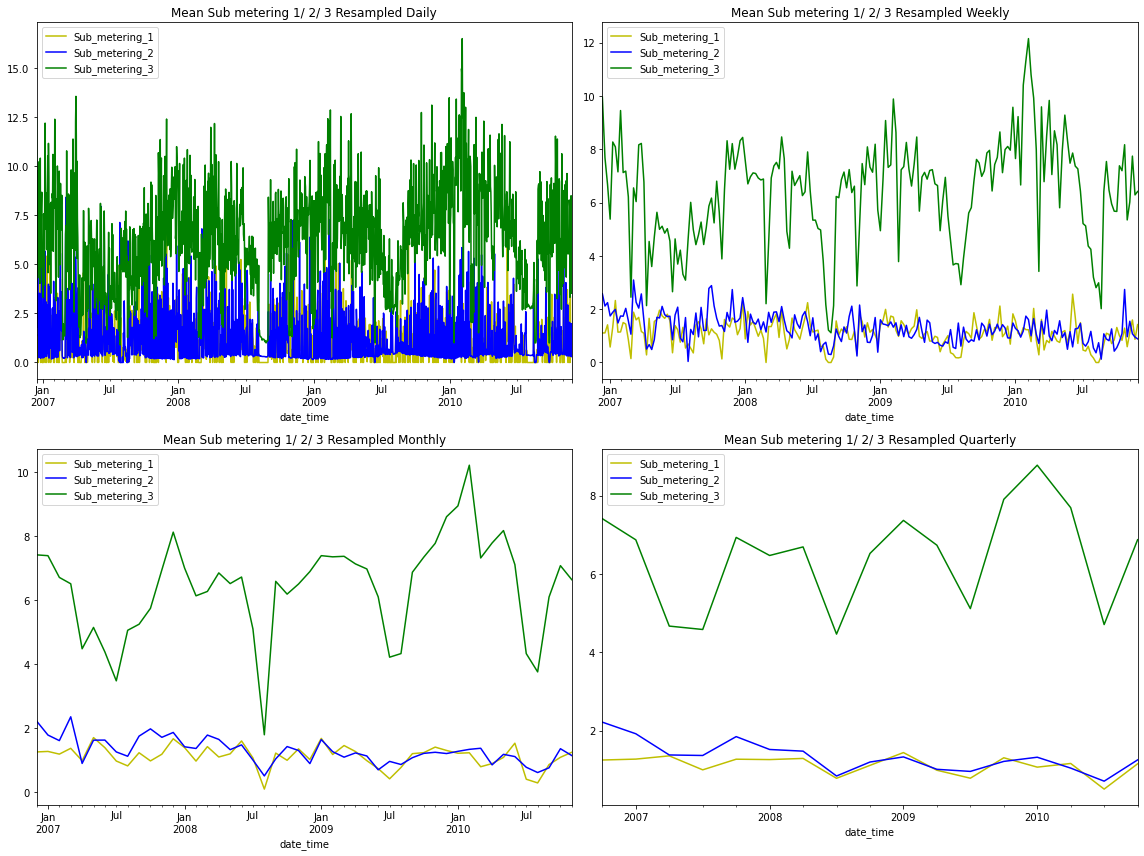

In [27]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot daily resampled data in the first subplot (top-left)
df_v2.Sub_metering_1.resample('D').mean().plot(color='y', legend=True, ax=axes[0, 0])
df_v2.Sub_metering_2.resample('D').mean().plot(color='b', legend=True, ax=axes[0, 0])
df_v2.Sub_metering_3.resample('D').mean().plot(color='g', legend=True, ax=axes[0, 0])
axes[0, 0].set_title('Mean Sub metering 1/ 2/ 3 Resampled Daily', fontsize=12)

# Plot weekly resampled data in the second subplot (top-right)
df_v2.Sub_metering_1.resample('W').mean().plot(color='y', legend=True, ax=axes[0, 1])
df_v2.Sub_metering_2.resample('W').mean().plot(color='b', legend=True, ax=axes[0, 1])
df_v2.Sub_metering_3.resample('W').mean().plot(color='g', legend=True, ax=axes[0, 1])
axes[0, 1].set_title('Mean Sub metering 1/ 2/ 3 Resampled Weekly', fontsize=12)

# Plot monthly resampled data in the third subplot (bottom-left)
df_v2.Sub_metering_1.resample('M').mean().plot(color='y', legend=True, ax=axes[1, 0])
df_v2.Sub_metering_2.resample('M').mean().plot(color='b', legend=True, ax=axes[1, 0])
df_v2.Sub_metering_3.resample('M').mean().plot(color='g', legend=True, ax=axes[1, 0])
axes[1, 0].set_title('Mean Sub metering 1/ 2/ 3 Resampled Monthly', fontsize=12)

# Plot quarterly resampled data in the fourth subplot (bottom-right)
df_v2.Sub_metering_1.resample('Q').mean().plot(color='y', legend=True, ax=axes[1, 1])
df_v2.Sub_metering_2.resample('Q').mean().plot(color='b', legend=True, ax=axes[1, 1])
df_v2.Sub_metering_3.resample('Q').mean().plot(color='g', legend=True, ax=axes[1, 1])
axes[1, 1].set_title('Mean Sub metering 1/ 2/ 3 Resampled Quarterly', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Sub_metering_3 has a significant higher value compare to the other two variables. It implies that electric water-heater and an air-conditioner produced the highest amount of energy over a certain peried compared to the other electrical devices.

## Daily Trend Analysis 

- Since our target to is to predict the global active power on hourly basis, let's focus on analyzing the daily trend of the features.

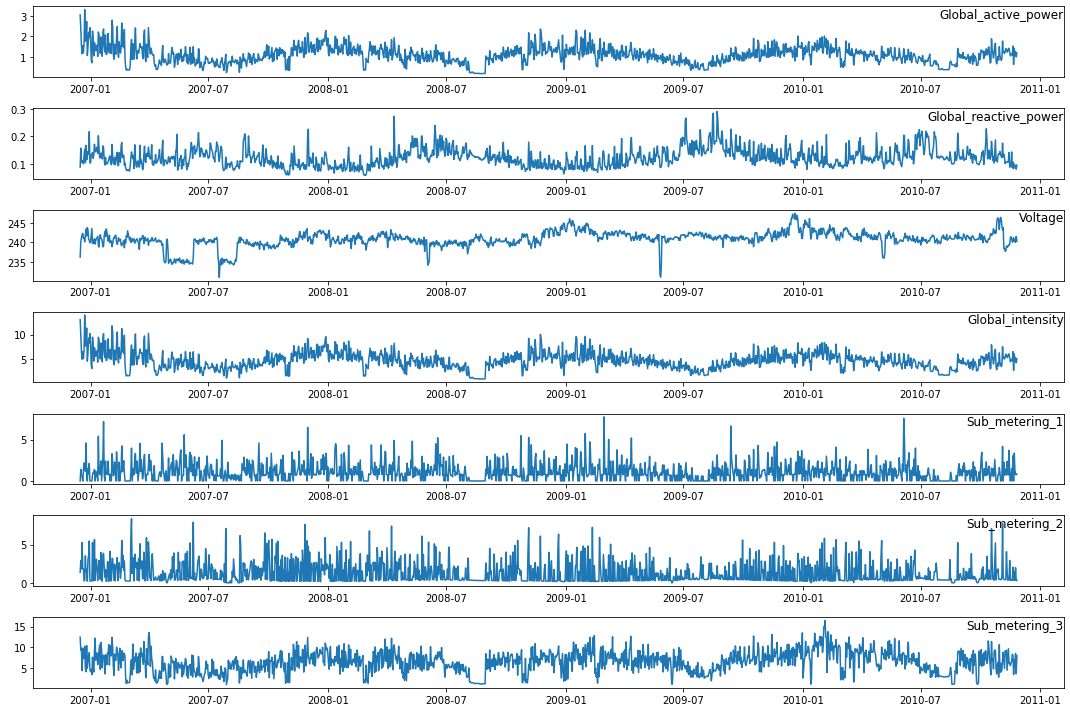

In [27]:
cols = [0, 1, 2, 3, 4, 5, 6]

# Resample the DataFrame to daily mean values
resampled_df_v2 = df_v2.resample('D').mean()

# Get the column names corresponding to the columns in cols
cols_name = df_v2.columns[cols]

# Plot each column in a single loop
plt.figure(figsize=(15, 10))
for i, col_idx in enumerate(cols):
    plt.subplot(len(cols), 1, i + 1)
    plt.plot(resampled_df_v2.index, resampled_df_v2.iloc[:, col_idx])
    plt.title(cols_name[i], y=0.75, loc='right')

plt.tight_layout()
plt.show()


Simply relying on visual inspection of graphs makes it difficult to discern trends or identify correlations among features. Let's explore alternative methods to investigate feature correlations effectively.

## Autocorrelation

Autocorrelation: 0.9680154947589378


<Figure size 1008x720 with 0 Axes>

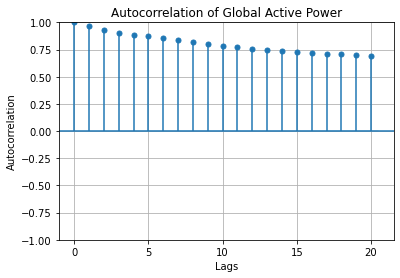

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the autocorrelation using pandas
autocorr_result = df_v2['Global_active_power'].autocorr()

# Print the autocorrelation value
print("Autocorrelation:", autocorr_result)

# Plot the autocorrelation using statsmodels
plt.figure(figsize=(14, 10))
plot_acf(df_v2['Global_active_power'], lags=20, alpha=0.05)
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Global Active Power")
plt.grid(True)
plt.show()

An autocorrelation score of 0.96 indicates that the current values of the time series are highly correlated with their past values. The time series tends to show a strong and persistent pattern that repeats over time.

## Cross-Correlation

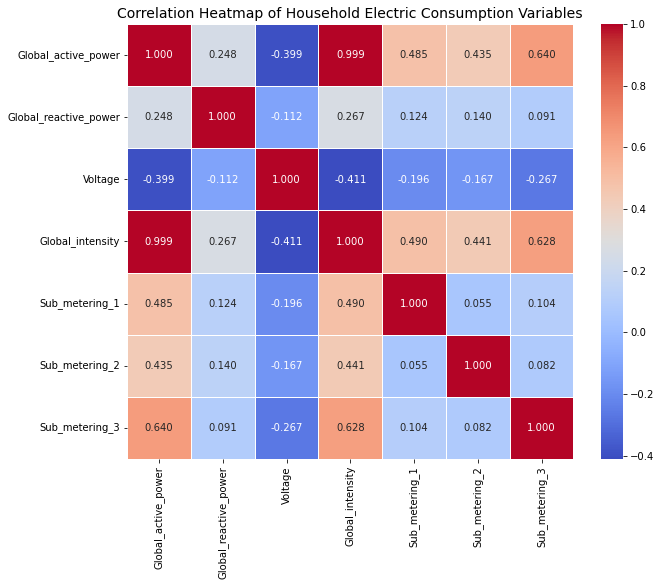

In [28]:
correlation_matrix = df_v2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap of Household Electric Consumption Variables', fontsize=14)
plt.show()

Global intensity is highly correlated with Global active power

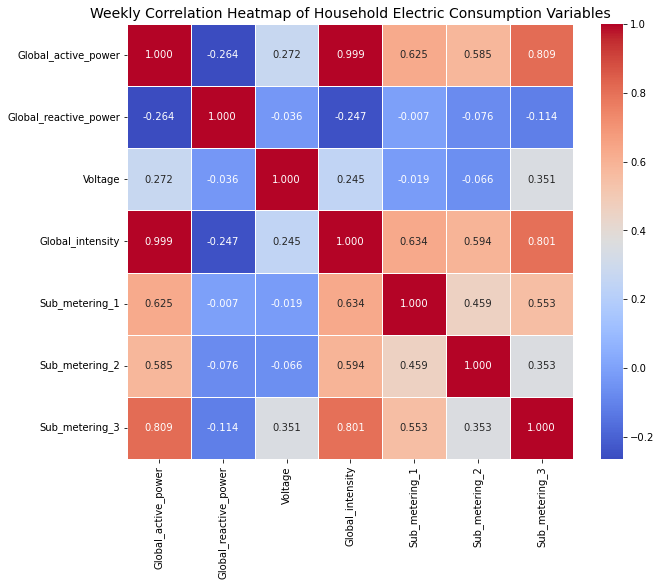

In [29]:
weekly_correlation_matrix= df_v2.resample('W').mean().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(weekly_correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Weekly Correlation Heatmap of Household Electric Consumption Variables', fontsize=14)
plt.show()

## Correlation with resampled monthly data

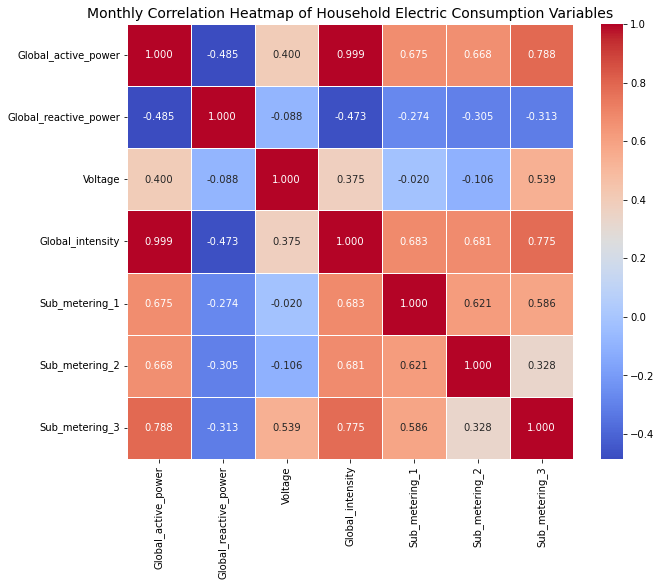

In [30]:
monthly_correlation_matrix= df_v2.resample('M').mean().corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Monthly Correlation Heatmap of Household Electric Consumption Variables', fontsize=14)
plt.show()

## Correlation with resampled quarterly data

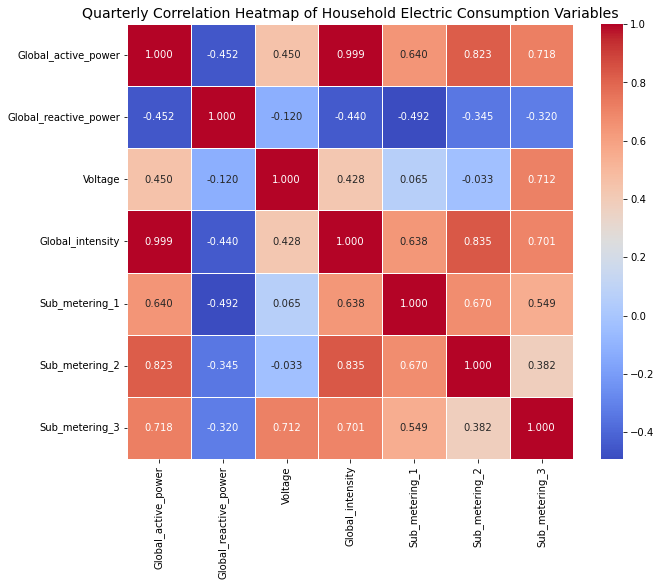

In [31]:
quarter_correlation_matrix= df_v2.resample('Q').mean().corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(quarter_correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Quarterly Correlation Heatmap of Household Electric Consumption Variables', fontsize=14)
plt.show()

Notice the distinct correlation scores with different resampling techniques:
- When analyzing time series data, the correlation score may vary significantly when using different resampling frequencies. 

- Resampling data to different time intervals, such as daily, weekly, monthly, or quarterly, aggregates the original data differently, resulting in changes to the patterns and relationships between variables. 

- For instance, when calculating the correlation between two variables with daily data, the score may capture short-term fluctuations and noise in the data, while resampling to monthly data may smooth out the fluctuations and emphasize longer-term trends.

- Consequently, the correlation score between the same variables would typically be higher when using monthly data compared to daily data. 

- These differences in correlation scores imply that the level of relationship or dependency between variables can be more pronounced or attenuated depending on the resampling frequency used.

## LSTM Modeling and Feature Engineering


In [69]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [32]:
transformed_data = df_v2.resample('h').mean()

The line of code `transformed_data = df_v2.resample('h').mean().values` serves two purposes in the context of the prediction task for future global active power in hourly basis:

1. Resampling the data to an hourly basis:
The `resample('h').mean()` part of the code resamples the original time series data (`df_v2`) to an hourly frequency by taking the mean of the data within each hourly interval. This aggregation ensures that the data is now represented at an hourly level, which matches the prediction task's requirement to forecast future global active power on an hourly basis. By resampling the data to hourly intervals, the model can better capture the variations and patterns in the data on an hourly time scale, which is essential for accurate predictions.

2. Converting the resampled data to a NumPy array:
The `.values` attribute at the end of the code converts the Pandas DataFrame resulting from the resampling process (`df_v2.resample('h').mean()`) into a NumPy array. Machine learning models, including deep learning models like LSTMs, typically work efficiently with NumPy arrays as input data. By converting the resampled data to a NumPy array, it becomes ready to be used as input data for modeling tasks. The NumPy array will have the hourly aggregated values of global active power, which can then be split into input sequences (X) and target sequences (y) for training and testing the prediction model.



## Series to supervised

In the context of time series data, lag features and forecast features are essential concepts used for creating a supervised learning problem from a sequential dataset. They play a crucial role in transforming time series data into a format suitable for training machine learning models for prediction tasks.

1. Lag Features:
   - Lag features represent past observations of a variable. For a given time series dataset, a lag feature at time "t" is the value of a variable at a previous time step, specifically "t - k" where "k" is the lag period or time shift. Essentially, lag features allow the model to consider the historical behavior of a variable up to "k" time steps before the current time point. 
   - For example, if you have hourly global active power data and want to predict the power consumption for the next hour, a lag feature for "k = 1" would be the global active power at the previous hour. Similarly, for "k = 2," it would be the global active power two hours ago, and so on.
   - By incorporating lag features, the model can learn from the temporal patterns and dependencies in the data, which can be crucial for making accurate predictions in time series forecasting.

2. Forecast Features:
   - Forecast features, also known as target features or output variables, represent the future observations of a variable that you want to predict. For a given time series dataset, a forecast feature at time "t" is the value of the variable you want to forecast at a future time step, specifically "t + k" where "k" is the forecast period or time ahead you want to predict.
   - Using the same example, if you have hourly global active power data and you want to forecast the power consumption for the next hour, the forecast feature for "k = 1" would be the global active power one hour ahead from the current time point.
   - Forecast features serve as the target or ground truth for the model during training. The model tries to learn the relationship between past lag features and the future forecast features to make accurate predictions.

In summary, lag features represent past observations used as input to predict future observations (forecast features) in time series data. By creating lag features and forecast features, you transform the time series data into a supervised learning problem, allowing you to apply various machine learning algorithms, such as regression or recurrent neural networks like LSTM, to make predictions based on historical patterns in the data.

In [33]:
transformed_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


I will formulate the supervised learning problem as predicting the Global_active_power at the current time (t) based on the Global_active_power measurement and other relevant features from the previous time step.

In [34]:
transformed_data_lag_features = transformed_data.shift(1) # Previous time step
transformed_data_lag_features.dropna(axis=0, inplace=True)
transformed_data_lag_features.reset_index(drop=True, inplace=True)

# Add suffix "(t-1)" to each column name
transformed_data_lag_features.columns = transformed_data_lag_features.columns + ' (t-1)'


transformed_data_forecast_features = transformed_data.shift(-1) 
transformed_data_forecast_features.dropna(axis=0, inplace=True)
transformed_data_forecast_features.reset_index(drop=True, inplace=True)

#Target forecast variable
transformed_data_forecast_features.drop(['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
                                         'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace=True)  

target_var = transformed_data_forecast_features.copy()

# Add suffix "(t)" to "Global_active_power"
target_var.columns = target_var.columns + ' (t)'

new_data = pd.concat([transformed_data_lag_features, target_var], axis=1)

In [35]:
new_data

,Global_active_power (t-1),Global_reactive_power (t-1),Voltage (t-1),Global_intensity (t-1),Sub_metering_1 (t-1),Sub_metering_2 (t-1),Sub_metering_3 (t-1),Global_active_power (t)
0,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,3.632200
1,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,3.400233
2,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,3.268567
3,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,3.056467
4,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,2.200133
...,...,...,...,...,...,...,...,...
34583,1.067933,0.215633,240.457833,4.610000,0.0,0.950000,0.000000,1.725900
34584,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667,1.573467
34585,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000,1.659333
34586,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000,1.163700


The new_data DataFrame combines lag features (transformed_data_lag_features), representing time (t-1), with the target variable (target_var), representing time (t), to prepare the data for time series forecasting. It stacks them horizontally to create a dataset where each row contains features from the previous time step and the corresponding target variable for the current time step. This format is suitable for supervised learning models that predict future values based on past observations in time series analysis.

In [70]:
new_data_values = new_data.values

X = new_data_values [:, :-1]
y = new_data_values[:, -1] # target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12)

## Normalization

In [80]:
x_scaler = MinMaxScaler() #less prone to outliers

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)


y_scaler = MinMaxScaler() 

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

In the context of LSTM models for time-series forecasting, the input data needs to be shaped in a specific way to be fed into the LSTM layer.

In Keras, the LSTM layer expects an input with three dimensions: (batch_size, timesteps, features).

* batch_size: The number of samples in each mini-batch used for training. It can be set to None if the batch size is not fixed.
* timesteps: The number of time steps (sequence length) in each sample. This corresponds to the number of past time steps we use to make predictions for the next time step.
* features: The number of features at each time step. For time-series data, this often corresponds to the number of variables or input features.

In [81]:
# reshape input to be 3D [samples, timesteps, features]

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

## Model Architecture

* Model: Sequential neural network model is used.

* Architecture: It consists of an LSTM layer with 100 units as the first layer.

* Input shape: The input shape of the LSTM layer is determined by the shape of the training data (X_train_scaled.shape[1], X_train_scaled.shape[2]), where X_train_scaled is the scaled training data.

* Dropout: A dropout layer with a dropout rate of 0.2 is added after the LSTM layer to prevent overfitting.

* Output layer: A Dense layer with 1 unit is added as the output layer.

* Loss function: Mean squared error (MSE) is chosen as the loss function for regression tasks.

* Optimizer: The Adam optimizer is used for model optimization.

In [84]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2)) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# patience indicates the number of epochs with no improvement after which training will be stopped.

In [85]:
# Fit the network with early stopping
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=70, 
                    validation_data=(X_test_scaled, y_test_scaled), verbose=2, 
                    shuffle=False, callbacks=[early_stopping])

Epoch 1/100
99/99 - 10s - loss: 0.0150 - val_loss: 0.0111 - 10s/epoch - 97ms/step
Epoch 2/100
99/99 - 1s - loss: 0.0113 - val_loss: 0.0103 - 1s/epoch - 12ms/step
Epoch 3/100
99/99 - 1s - loss: 0.0106 - val_loss: 0.0098 - 1s/epoch - 12ms/step
Epoch 4/100
99/99 - 1s - loss: 0.0105 - val_loss: 0.0096 - 1s/epoch - 12ms/step
Epoch 5/100
99/99 - 1s - loss: 0.0104 - val_loss: 0.0095 - 1s/epoch - 13ms/step
Epoch 6/100
99/99 - 1s - loss: 0.0103 - val_loss: 0.0095 - 1s/epoch - 13ms/step
Epoch 7/100
99/99 - 1s - loss: 0.0103 - val_loss: 0.0094 - 1s/epoch - 13ms/step
Epoch 8/100
99/99 - 1s - loss: 0.0102 - val_loss: 0.0094 - 1s/epoch - 12ms/step
Epoch 9/100
99/99 - 1s - loss: 0.0102 - val_loss: 0.0094 - 1s/epoch - 12ms/step
Epoch 10/100
99/99 - 1s - loss: 0.0102 - val_loss: 0.0094 - 1s/epoch - 12ms/step
Epoch 11/100
99/99 - 1s - loss: 0.0102 - val_loss: 0.0094 - 1s/epoch - 12ms/step
Epoch 12/100
99/99 - 1s - loss: 0.0102 - val_loss: 0.0094 - 1s/epoch - 12ms/step
Epoch 13/100
99/99 - 1s - loss: 0.0

Stopped at epoch = 22

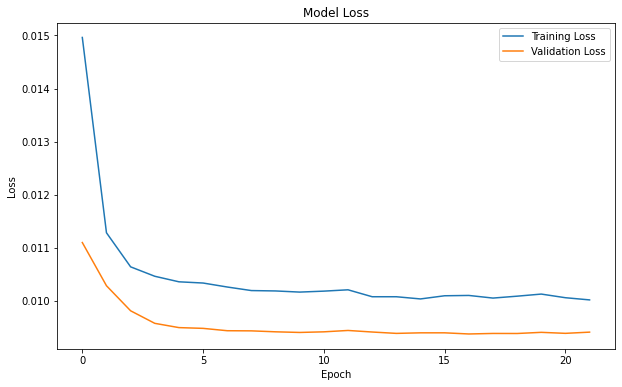

In [91]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(10, 6))

# Create a plot to visualize the model loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

  1/865 [..............................] - ETA: 36s

865/865 [==============================] - 2s 2ms/step


<Figure size 720x432 with 0 Axes>

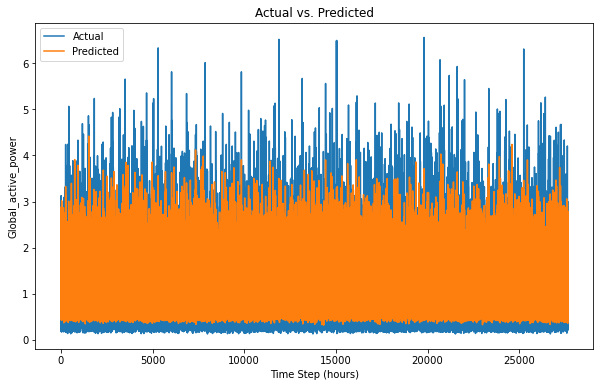

In [94]:
y_pred_scaled = model.predict(X_test_scaled)

# Invert scaling to get predictions in the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)


plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time Step (hours)')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()


Due to the large number of data points over a span of around 25,000 hours, visualizing the entire time series can be overwhelming. Hence, we focus on the initial 72 hours for the visualization of predicted values compared to the actual data. This subset provides a more concise and easily interpretable view of the model's performance in the early hours of prediction.

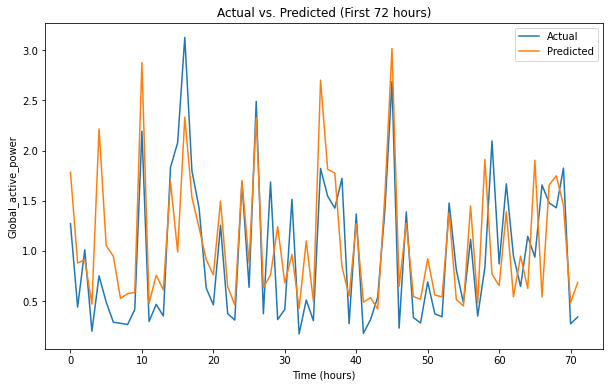

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:72], label='Actual')
plt.plot(y_pred[:72], label='Predicted')
plt.title('Actual vs. Predicted (First 72 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()